Pandas analysis
This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [10]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [11]:
#N = 500000
df = pd.read_csv('data_000637.txt')#, nrows=N)
df.head(10)


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


2. Find out the number of BX in a ORBIT (the value 'x').

In [7]:
X = max(df["BX_COUNTER"])
#print(df["BX_COUNTER"].value_counts())
print("Max BX_COUNTER:", X)
print("X =", X+1)

Max BX_COUNTER: 3563
X = 3564


3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
t_orb2 = max(df["ORBIT_CNT"])
t_orb1 = min(df["ORBIT_CNT"])

t_bxc2 = max(df[df["ORBIT_CNT"] == t_orb2]["BX_COUNTER"])
t_bxc1 = min(df[df["ORBIT_CNT"] == t_orb1]["BX_COUNTER"])

t_tdc2 = max(df[(df["ORBIT_CNT"] == t_orb2) & (df["BX_COUNTER"] == t_bxc2)]["TDC_MEAS"])
t_tdc1 = min(df[(df["ORBIT_CNT"] == t_orb1) & (df["BX_COUNTER"] == t_bxc1)]["TDC_MEAS"])

time = ( (t_orb2 - t_orb1)*25*X +
         (t_bxc2 - t_bxc1)*25   +
         (t_tdc2 - t_tdc1)*25/30 )
        
print("Total run time:", time, "ns\n",
      "              ",  time/1e9, "s")

Total run time: 980141153.3333334 ns
                0.9801411533333334 s


4. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
df["ABS_TIME"] = ((df["ORBIT_CNT"]  - t_orb1)*25*X +
                  (df["BX_COUNTER"] - t_bxc1)*25   +
                  (df["TDC_MEAS"]   - t_tdc1)*25/30)
df.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,0.000000
1,1,0,124,3869200167,2374,27,0.833333
2,1,0,63,3869200167,2553,28,4476.666667
3,1,0,64,3869200167,2558,19,4594.166667
4,1,0,64,3869200167,2760,25,9649.166667
5,1,0,63,3869200167,2762,4,9681.666667
6,1,0,61,3869200167,2772,14,9940.000000
7,1,0,139,3869200167,2776,0,10028.333333
8,1,0,62,3869200167,2774,21,9995.833333
9,1,0,60,3869200167,2788,7,10334.166667


5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [9]:
df["HEAD"] = np.random.randint(2, size=len(df))
df.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,0,0,123,3869200167,2374,26
1,0,0,124,3869200167,2374,27
2,0,0,63,3869200167,2553,28
3,0,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,0,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,0,0,139,3869200167,2776,0
8,0,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


6. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
df2 = df[df["HEAD"] == 1]
df2.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
1,1,0,124,3869200167,2374,27,0.833333
2,1,0,63,3869200167,2553,28,4476.666667
4,1,0,64,3869200167,2760,25,9649.166667
6,1,0,61,3869200167,2772,14,9940.000000
8,1,0,62,3869200167,2774,21,9995.833333
10,1,1,7,3869200167,2785,4,10256.666667
11,1,0,64,3869200167,2786,19,10294.166667
13,1,0,36,3869200167,2791,23,10422.500000
19,1,0,53,3869200167,2796,26,10550.000000
21,1,0,57,3869200167,2789,10,10361.666667


7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

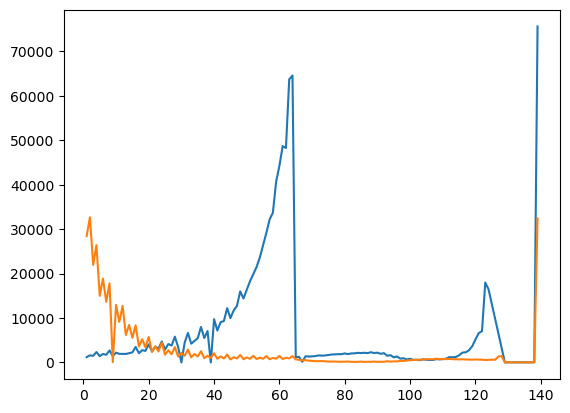

In [8]:
plt.plot(((df[df["FPGA"]==0])["TDC_CHANNEL"].value_counts()).sort_index())
plt.plot(((df[df["FPGA"]==1])["TDC_CHANNEL"].value_counts()).sort_index())



8. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [13]:
df["COUNTS"] = 1
counts = df.groupby("TDC_CHANNEL").value_counts()#["COUNTS"].sum()
print(counts.sort_values().head(3))

TDC_CHANNEL  HEAD  FPGA  ORBIT_CNT   BX_COUNTER  TDC_MEAS  COUNTS
1            1     0     3869200184  1280        12        1         1
62           1     0     3869202967  2073        19        1         1
                         3869202970  156         12        1         1
dtype: int64


9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [16]:
o = df["ORBIT_CNT"].unique()
print(o)
print("Nuber of unique orbits:", len(o))
o139 = df[df["TDC_CHANNEL"] == 139]["ORBIT_CNT"].unique()
print(o139)
print("Nuber of unique orbits (with at least one measurement from TDC_CHANNEL=139):", len(o139))


[3869200167 3869200168 3869200169 ... 3869211169 3869211170 3869211171]
Nuber of unique orbits: 11001
[3869200167 3869200168 3869200169 ... 3869211169 3869211170 3869211171]
Nuber of unique orbits (with at least one measurement from TDC_CHANNEL=139): 10976
